# Assignment 1
Name: Jaimon Thypramabil Thomas
<br>StudentID : 29566428

### Library Used

In [1]:
library(reshape2) # used for melt function
library(ggplot2) # used for generating plots

Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"

## Section A. Model Complexity and Model Selection
### Question 1

### I. Implement the KNN regressor function:
### knn(train.data, train.label, test.data, K=3)

In [2]:
#function used to calculate average of an array
averageCalculator <- function(x) {
    return(round((sum(x)/length(x)),2))
}

# KNN Regressor function returns predicted values based on manhattan distance
knn.regressor <- function(train.data, train.label, test.data, K=3){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples using manhattan
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:test.len, (test.len+1):(test.len+train.len)]
    predict.label = rep(0,test.len)
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        if(test.len == 1){
            #Extracting the top K value indexes based on sorted distances
            nn <- as.data.frame(sort(dist, index.return = TRUE))[1:K,2]
        }
        else{
            #Extracting the top K value indexes based on sorted distances
            nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        }
        ###... and calculate the predicted value according to the average value
        predict.label[i]<- (averageCalculator(train.label[nn]))
    }
    ## return the class labels as output
    return (predict.label)
}

### II. Plot the training and the testing errors versus 1/K for K=1,.., 30 in one plot, using the Task1A_train.csv and Task1A_test.csv datasets provided for this assignment. Save the plot in your Jupyter Notebook file for Question 1. Report your chosen error function in your Jupyter Notebook file.


#### Loading dataset

In [3]:
#Reading data from csv
task1_train <- read.csv("Task1A_train.csv")
task1_test <- read.csv("Task1A_test.csv")
head(task1_test)

x1,y
1960.25,0.63
1960.75,0.44
1961.25,0.69
1961.75,0.55
1962.25,0.77
1962.75,0.60


In [4]:
### Splitting train and test data and labels
train.data <- as.data.frame(task1_train[1:nrow(task1_train), -2])
colnames(train.data)[1] <-'x1'
train.label <- task1_train[1:nrow(task1_train), 2]
test.data <- as.data.frame(task1_test[1:nrow(task1_test), -2])
colnames(test.data)[1] <-'x1'
test.label <- task1_test[1:nrow(task1_test), 2]

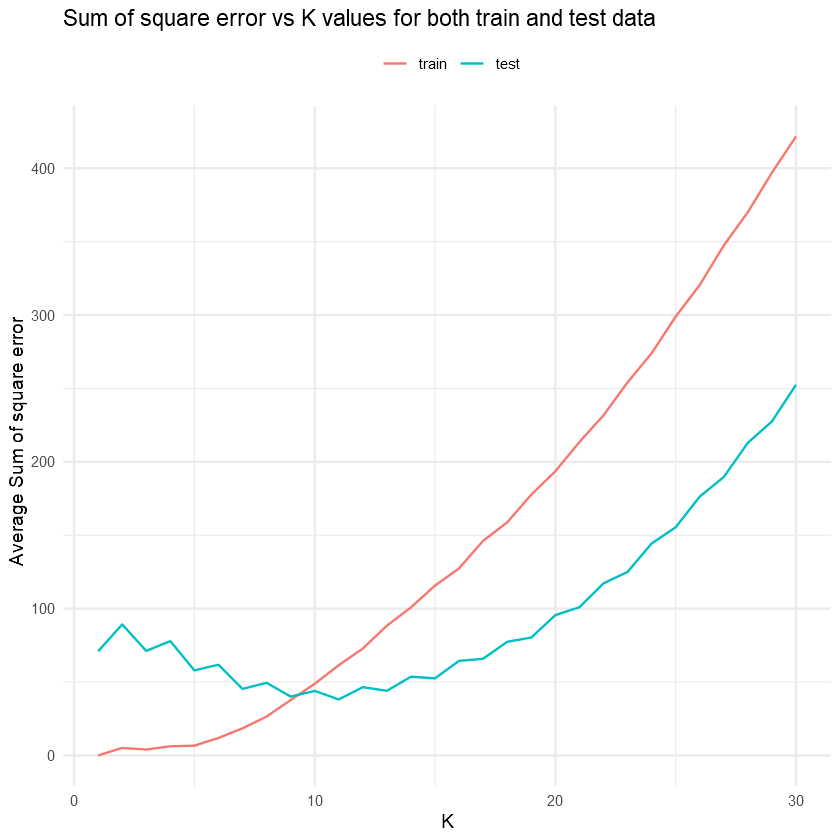

In [10]:
#Calculating the training and testing error for each value of K
K=30
miss <- data.frame('K'=1:K, 'train'=rep(0,K), 'test'=rep(0,K))
for (k in 1:K){
    #Calculating the sum of square error for training and testing data
    miss[k,'train'] <- sum((knn.regressor(train.data, train.label, train.data, K=k) - train.label)**2)/length(train.data)
    miss[k,'test'] <-  sum((knn.regressor(train.data, train.label, test.data, K=k)  - test.label)**2)/length(test.data)
}

miss.m <- melt(miss, id='K') # reshape for visualization
names(miss.m) <- c('K', 'type', 'error')
ggplot(data=miss.m, aes(x=K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() + theme(legend.position="top") +
      labs( title= "Sum of square error vs K values for both train and test data", y=" Average Sum of square error",
           x = "K")

Note: Here the Error Function that I have choosen is average of sum of squares


### III. Report (in your Jupyter Notebook file) the optimum value for K in terms of the testing error. Discuss the values of K and model complexity corresponding to underfitting and overfitting based on your plot in the previous part (Part II).


In [6]:
#function used to find the min value
#params
#dataframe - data frame used
#key.column.number - column no which has the Key in the data frame 
#value.column.number - column no which has the value in the data frame 
find.min.key <- function(dataframe, key.column.number = 1,value.column.number = 3){
    minVal = -1 #used to store the min value
    minK = NULL #used to store the Key of the min value
    for(i in 1:nrow(dataframe)) {
        if(minVal == -1){
            #intialising minval and key for the first entry
            minVal = dataframe[i,value.column.number]
            minK = dataframe[i,key.column.number]
        }
        else if(dataframe[i,value.column.number] < minVal){
            #updating the key and min value when current key has min value compare to previous val
            minVal = dataframe[i,value.column.number]
            minK = dataframe[i,key.column.number]
        }
    }
    return(minK)
}

In [7]:
minK = find.min.key(miss)
cat('The optimum value for K in terms of testing error is',minK,'as the testing error is minimum for this value.')

The optimum value for K in terms of testing error is 11 as the testing error is minimum for this value.

Here from the graph we can see that values from 1-5 definitly is overfitting as we can see that the training error is close to 0 and test error is pretty much high. We can also see that value of K above 20 can be considered as underfitting as in this region as k increases both the training and test error gets increased. In general we can see that as K increases the model get converted from overfitting to underfitting